In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,auc,roc_curve
import sklearn.svm as svm
from sklearn.multiclass import OneVsOneClassifier
from scipy import interp

In [2]:
data=pd.read_csv("C:/Users/cuiyao/毕业设计SVM/SVM_GSE35809.csv")
X=data.iloc[:,1:12986]  #  分割样本特征
Y=data.iloc[:,12986:12987]  #  分割样本标签
y=np.ravel(Y)  


In [19]:
##  设计模型----线性核
random_state = np.random.RandomState(0)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)  #  分割训练集和测试集，测试集占0.2
model=svm.SVC(kernel="linear",probability=True,decision_function_shape="ovo")  #  定义模型，线性核函数，ovo分类方法

In [49]:
##  设计模型----多项式核
random_state = np.random.RandomState(0)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)  #  分割训练集和测试集，测试集占0.2
model=svm.SVC(kernel="poly",degree=3,probability=True,decision_function_shape="ovo")

In [104]:
##  设计模型----RBF核
random_state = np.random.RandomState(4)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)  #  分割训练集和测试集，测试集占0.2
model=svm.SVC(kernel="rbf",gamma='auto',probability=True,decision_function_shape="ovo")

In [105]:
##  训练模型
model.fit(x_train,y_train) #  使用训练集训练
acu_test=model.score(x_test,y_test)  #  测试集分类准确率
print("预测准确率：",acu_test)  # 准确率
y_pred=model.predict(x_test)  #  预测的标签
print("预测的标签：",y_pred)
print("真实的标签：",y_test)
y_score=model.decision_function(x_test)  #  得到每对分类器的输出
print("测试样本在每一类的得分：",y_score)
proba=model.predict_proba(x_test)  #  属于每一类的概率
print("测试样本属于每一类的概率：",proba)

SVC(decision_function_shape='ovo', gamma='auto', probability=True)

预测准确率： 0.9642857142857143
预测的标签： [2 2 1 0 0 0 0 1 2 1 0 0 2 0 0 0 0 0 0 0 0 1 2 0 1 2 2 1]
真实的标签： [2 2 1 0 0 0 0 1 2 2 0 0 2 0 0 0 0 0 0 0 0 1 2 0 1 2 2 1]
测试样本在每一类的得分： [[-0.06800543 -0.50454901 -0.50377675]
 [-0.03561081 -1.02449051 -1.05441624]
 [-0.35206195  0.20929183  0.55821539]
 [ 1.1250964   1.23820432  0.17197379]
 [ 0.13850959  0.35452487  0.31483258]
 [ 0.22951197  0.97234987  0.88461623]
 [ 0.49384135  0.23884869 -0.29669289]
 [-0.17927773  0.80630989  1.08690963]
 [-0.55718155 -0.84132143 -0.34710763]
 [-0.90498606 -0.55411366  0.34247954]
 [ 0.68711632  1.20143199  0.69362685]
 [ 1.11726036  1.31433466  0.12575238]
 [ 0.14075788 -0.65568848 -0.81165976]
 [ 0.58879963  0.64666508  0.07559287]
 [ 0.86674265  0.61038876 -0.28703427]
 [ 1.12687014  0.83326915 -0.37923866]
 [ 0.91450869  0.82139663  0.01784646]
 [ 0.11633237  0.2972321   0.19401147]
 [ 0.84014198  0.50806553 -0.33803122]
 [ 0.92247632  0.73988649 -0.1848504 ]
 [ 0.16883961  0.71960545  0.59385377]
 [-0.4516841

In [106]:
## ROC值
fpr=dict()
tpr=dict()
roc_auc=dict()
y_test_label=label_binarize(y_test, classes=[0, 1, 2])
y_pred_label=label_binarize(y_pred, classes=[0, 1, 2])
for i in range(3):
    fpr[i],tpr[i],_=roc_curve(y_test_label[:,i],proba[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

In [107]:
# y_test_label
print("fpr：",fpr)
print("tpr：",tpr)
print("roc_auc：",roc_auc)

fpr： {0: array([0., 0., 0., 1.]), 1: array([0.        , 0.        , 0.        , 0.04347826, 0.04347826,
       1.        ]), 2: array([0.  , 0.  , 0.  , 0.05, 0.05, 1.  ])}
tpr： {0: array([0.        , 0.06666667, 1.        , 1.        ]), 1: array([0. , 0.2, 0.4, 0.4, 1. , 1. ]), 2: array([0.   , 0.125, 0.875, 0.875, 1.   , 1.   ])}
roc_auc： {0: 1.0, 1: 0.9739130434782609, 2: 0.9937499999999999}


C:\Users\cuiyao\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic to multi-class')

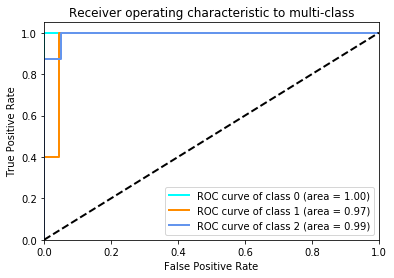

In [108]:
# 绘制ROC曲线
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_label.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.savefig('AUC_rbf_0.4.svg',dpi=600)
plt.show()

In [28]:
#  不同核函数
def svc(kernel):
    return svm.SVC(kernel=kernel,decision_function_shape="ovo")

def modelist():
    modelist=[]
    kernelist={"linear","poly","rbf","sigmoid"}
    for each in kernelist:
        modelist.append(svc(each))
    return modelist

def svc_model(model):
    model.fit(x_train,y_train)
    acu_test=model.score(x_test,y_test)
    y_pred=model.predict(x_test)
    return acu_test

def run_svc_model(modelist):
    result={"kernel":[],"acu_test":[]}
    for model in modelist:
        acu_test=svc_model(model)
        try:
            result["kernel"].append(model.kernel)
        except:
            result["kernel"].append(None)
        result["acu_test"].append(acu_test)
    return pd.DataFrame(result)

run_svc_model(modelist())

,kernel,acu_test
0,poly,0.909091
1,sigmoid,0.454545
2,linear,0.909091
3,rbf,0.909091


In [29]:
#  优化SVC的惩罚系数C
def test_c():
    result={"C":[],"linear_acu_test":[],
            "poly_acu_test":[],
            "rbf_acu_test":[]}
    for c in range(10,101,10):
        model=svm.SVC(kernel="linear",C=c,decision_function_shape="ovo")
        acu_test=svc_model(model)
        result["C"].append(c)
        result["linear_acu_test"].append(acu_test)
    for c in range(10,101,10):
        model=svm.SVC(kernel="rbf",C=c,decision_function_shape="ovo")
        acu_test=svc_model(model)
        result["rbf_acu_test"].append(acu_test)
    for c in range(10,101,10):
        model=svm.SVC(kernel="poly",C=c,decision_function_shape="ovo")
        acu_test=svc_model(model)
        result["poly_acu_test"].append(acu_test)
    df=pd.DataFrame(result)
    return df
test_c()

,C,linear_acu_test,poly_acu_test,rbf_acu_test
0,10,0.909091,0.909091,0.909091
1,20,0.909091,0.909091,0.909091
2,30,0.909091,0.909091,0.909091
3,40,0.909091,0.909091,0.909091
4,50,0.909091,0.909091,0.909091
5,60,0.909091,0.909091,0.909091
6,70,0.909091,0.909091,0.909091
7,80,0.909091,0.909091,0.909091
8,90,0.909091,0.909091,0.909091
9,100,0.909091,0.909091,0.909091
